<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/mann_whitney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mann-Whitney U test

The **Mann Whitney U test** is a popular nonparametric(non parametric means making no assumptions about the parameters of the frequency distribution). test used to compare the outcomes between two independent groups.

The Mann Whitney U test, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test, is used to test **whether two samples are likely to derive from the same population** (i.e., that the two populations have the same shape or distribution). It is the non-parametric version of the student's t test.

Some investigators interpret this test as comparing **the medians between the two populations**.

Recall that the **parametric** test compares the **means** $(H_0: \mu_1=\mu_2)$ between independent groups.

Mann-Whitney U test Hypotheses

In contrast, the research hypotheses for the nonparametric test are stated as follows:

* $H_0$: the two populations are equal (i.e. have the same median)
* $H_1$: The two populations are not equal.

Assumptions:

1. The **dependent variable** should be measured at the **ordinal** or **continuous** level.


2. The **independent variable** should consist of **two categorical, independent groups**.


3. We should have **independence of observations**, which means that there is no relationship between the observations in each group or between the groups themselves.


4. Can be used when our **two variables** are **not** normally distributed. However, in order to know how to interpret the results from a Mann-Whitney U test, we have to determine whether our two distributions have the same shape.

**Data** ~ We have 2 integer dtype variables generated randomly.

In [ ]:
#importing libraries and data
import pandas as pd
df = pd.read_csv("myFile0.csv")
df.head()

,var1,var2
0,46,47
1,80,56
2,50,72
3,36,86
4,42,7


In [ ]:
#descriptive statistics
df.agg(['count', 'mean','median','min','max','skew'])

,var1,var2
count,100.000000,100.000000
mean,50.070000,54.840000
median,51.000000,59.500000
min,2.000000,2.000000
max,100.000000,98.000000
skew,0.148941,-0.311347


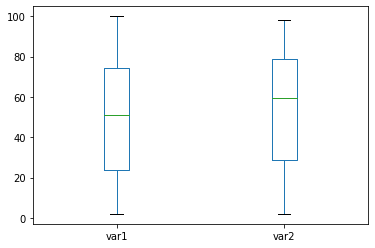

In [ ]:
# generate boxplot to check data spread
import matplotlib.pyplot as plt
df.boxplot(column=['var1', 'var2'], grid=False)
plt.show()

checking data distribution using shapiro-wilk test and histograms ~

In [ ]:
#checking data distribution
import scipy.stats as stats
w, pvalue = stats.shapiro(df['var1'])
w, pvalue

(0.9439075589179993, 0.00033647846430540085)

In [ ]:
w, pvalue = stats.shapiro(df['var2'])
w, pvalue

(0.9465518593788147, 0.0004951968439854681)

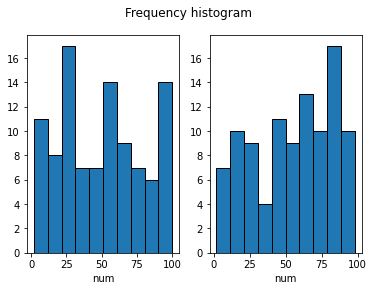

In [ ]:
#histogram
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram')
ax1.hist(df['var1'], bins=10, histtype='bar', ec='k')
ax2.hist(df['var2'], bins=10, histtype='bar', ec='k')
ax1.set_xlabel("num")
ax2.set_xlabel("num")
plt.show()

As the **p value** obtained from the Shapiro-Wilk test is **significant** (**p < 0.05**), we conclude that the data is **not normally distributed**. Further, in histogram the data distribution shape is not normal. Therefore, Mann-Whitney U test is more appropriate than a t-test for analyzing the two samples.

In [ ]:
#performing the test

#we are comparing median of two variables as they have a similar shape of data distribution.
#If two groups don't have similar shapes, then we should compare mean ranks.

import scipy.stats as stats
#performing the two-sided test
stats.mannwhitneyu(x=df['var1'], y=df['var2'], alternative = 'two-sided')

MannwhitneyuResult(statistic=4523.5, pvalue=0.24474283018044196)

Mann-Whitney U test interpretation:

As the p value obtained from the Mann-Whitney U test is insignificant (U = 4523.5, p > 0.05), we conclude that some **descriptive value** (some inherent meaning for eg blood pressure) of the two variables is significantly different from each other


One-sided Mann-Whitney U test ~

while performing one-sided test our statement is that median of A is greater than median of B.

In [ ]:
stats.mannwhitneyu(x=df['var1'], y=df['var2'], alternative = 'greater')

MannwhitneyuResult(statistic=4523.5, pvalue=0.8781234997906666)

One-sided Mann-Whitney U test interpretation:

As the p value obtained from the Mann-Whitney U test is insignificant (U = 4523.5, p > 0.05), we conclude that the **descriptive value** of the A is **not** significantly greater than the B.